## Libraries

In [52]:
import sympy as sym
import numpy as np
import pandas as pd
from scipy import optimize


import matplotlib.pyplot as plt
import matplotlib
params = {'axes.titlesize':'14',
          'xtick.labelsize':'14',
          'ytick.labelsize':'14',
          'font.size':'14',
          'legend.fontsize':'medium',
          'lines.linewidth':'1.5',
          'font.weight':'normal',
          'lines.markersize':'8'
          }
matplotlib.rcParams.update(params)
#plt.rcParams["mathtext.fontset"] = "cm"

# LONGITUDINAL UNARY ENCODING PROTOCOLS

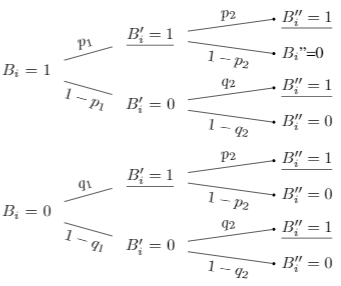

## Calculus of $\epsilon_1$

In [53]:
p1 = sym.Symbol('p1')
q1 = sym.Symbol('q1')

p2 = sym.Symbol('p2')
q2 = sym.Symbol('q2')

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(sym.log((p_star*(1-q_star))/(q_star*(1-p_star))))
e1

log((p1*p2 - q2*(p1 - 1))*(p2*q1 - q2*(q1 - 1) - 1)/((p2*q1 - q2*(q1 - 1))*(p1*p2 - q2*(p1 - 1) - 1)))

**log** will refer to **ln** throughout our analysis.

## Based on OUE and SUE protocols, we have four options on how to select p1, q1, p2, q2

- both sanitizations with OUE (L-OUE);
- both sanitizations with SUE (L-SUE);
- starting with OUE and then with SUE (L-OSUE);
- starting with SUE and then with OUE (L-SOUE);

# Finding parameters for each combination of L-UE protocols

## Analytical study of $\epsilon_1$ for L-OSUE

In [54]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# OUE parameters
p1 = 1/2
q1 = 1/(sym.exp(eps_perm) + 1)

# SUE parameters (p2+q2=1 , i.e., symmetric)
p2 = sym.Symbol('p2')
q2 = 1 - p2

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(sym.log((p_star*(1-q_star))/(q_star*(1-p_star))))
e1

log((-p2*exp(\epsilon_{\infty}) + p2 - 1)/(p2*exp(\epsilon_{\infty}) - p2 - exp(\epsilon_{\infty})))

### Isolating and solving for p2 (in terms of $\epsilon_{\infty}$ and $\epsilon_1$)

In [55]:
p2 = sym.solve((p_star*(1-q_star))/(q_star*(1-p_star)) - sym.exp(eps_1),p2)
sym.simplify(p2[-1])

(1.0 - exp(\epsilon_{1} + \epsilon_{\infty}))/(exp(\epsilon_{1}) - exp(\epsilon_{\infty}) - exp(\epsilon_{1} + \epsilon_{\infty}) + 1.0)

### Validation: $e^{\epsilon_1}$ == $e^{\epsilon_1}$ ?

In [56]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# OUE parameters
p1 = 1/2
q1 = 1/(sym.exp(eps_perm) + 1)

# SUE parameters
p2 = (1 - sym.exp(eps_1 + eps_perm)) / (sym.exp(eps_1) - sym.exp(eps_perm) - sym.exp(eps_1 + eps_perm) +1)
q2 = 1 - p2

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(p_star*(1-q_star))/(q_star*(1-p_star))
sym.simplify(e1)

1.0*exp(\epsilon_{1})

### Numerical evaluation of e1

In [57]:
# select upper and lower privacy parameters
eps_perm = 1
eps_1 = 0.1

p1 = 1/2
q1 = 1/(np.exp(eps_perm) + 1)

p2 = (1 - np.exp(eps_1 + eps_perm)) / (np.exp(eps_1) - np.exp(eps_perm) - np.exp(eps_1 + eps_perm) +1)
q2 = 1 - p2

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

np.log((p_star*(1-q_star))/(q_star*(1-p_star))), eps_1

(0.10000000000000007, 0.1)

### General Function for L_OSUE

In [58]:
def param_L_OSUE(eps_perm,eps_1):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-OSUE protocol.
    input: upper (eps_perm) and lower (eps_1) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # OUE parameters
    p1 = 1/2
    q1 = 1/(np.exp(eps_perm) + 1)

    # SUE parameters
    p2 = (1 - np.exp(eps_1 + eps_perm)) / (np.exp(eps_1) - np.exp(eps_perm) - np.exp(eps_1 + eps_perm) +1)
    q2 = 1 - p2
       
    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den), 4) == eps_1:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

## Analytical study of $\epsilon_1$ for L-OUE

In [59]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# OUE parameters
p1 = 1/2
q1 = 1/(sym.exp(eps_perm) + 1)

# OUE parameters
p2 = 0.5
q2 = sym.Symbol('q2')

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(sym.log((p_star*(1-q_star))/(q_star*(1-p_star))))
e1

log((0.5*q2 + 0.25)*(q2*exp(\epsilon_{\infty}) - exp(\epsilon_{\infty}) - 0.5)/((0.5*q2 - 0.75)*(q2*exp(\epsilon_{\infty}) + 0.5)))

### Isolating and solving for q2 (in terms of $\epsilon_{\infty}$ and $\epsilon_1$)

In [60]:
q2 = sym.solve((p_star*(1-q_star))/(q_star*(1-p_star)) - sym.exp(eps_1), q2)
sym.simplify(q2[-1])

(-1.11803398874989*sqrt(0.1*exp(\epsilon_{1}) + 0.05*exp(2.0*\epsilon_{1}) + 0.3*exp(\epsilon_{\infty}) + 0.45*exp(2.0*\epsilon_{\infty}) - exp(\epsilon_{1} + \epsilon_{\infty}) - 0.7*exp(\epsilon_{1} + 2.0*\epsilon_{\infty}) + 0.3*exp(2.0*\epsilon_{1} + \epsilon_{\infty}) + 0.45*exp(2.0*\epsilon_{1} + 2.0*\epsilon_{\infty}) + 0.05) - 0.25*exp(\epsilon_{1}) - 0.25*exp(\epsilon_{\infty}) + 0.75*exp(\epsilon_{1} + \epsilon_{\infty}) - 0.25)*exp(-\epsilon_{\infty})/(exp(\epsilon_{1}) - 1.0)

### Numerical evaluation of e1

In [61]:
# select upper and lower privacy parameters
eps_perm = 1
eps_1 = 0.25

p1 = 1/2
q1 = 1/(np.exp(eps_perm) + 1)

p2 = 0.5
q2 = ((-1.11803398874989 * np.sqrt(0.1 * np.exp(eps_1) + 0.05 * np.exp(2 * eps_1) + 0.3 * np.exp(eps_perm) + 0.45 * np.exp(2 * eps_perm) - np.exp(eps_1 + eps_perm) - 0.7 *  np.exp(eps_1 + 2 * eps_perm) + 0.3 * np.exp(2 * eps_1 + eps_perm) + 0.45 * np.exp(2.0 * eps_1 + 2.0  * eps_perm) + 0.05) - 0.25 * np.exp(eps_1) - 0.25 * np.exp(eps_perm) + 0.75 * np.exp(eps_1 + eps_perm) - 0.25) * np.exp(-eps_perm)) / (np.exp(eps_1) - 1.0)

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

np.log((p_star*(1-q_star))/(q_star*(1-p_star))), eps_1

(0.24999999999999128, 0.25)

### General Function for L_OUE

In [62]:
def param_L_OUE(eps_perm, eps_1):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-OUE protocol.
    input: upper (eps_perm) and lower (eps_1) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # OUE parameters
    p1 = 0.5
    q1 = 1 / (np.exp(eps_perm) + 1)

    # OUE parameters
    p2 = 0.5
    q2 = ((-1.11803398874989 * np.sqrt(0.1 * np.exp(eps_1) + 0.05 * np.exp(2 * eps_1) + 0.3 * np.exp(eps_perm) + 0.45 * np.exp(2 * eps_perm) - np.exp(eps_1 + eps_perm) - 0.7 *  np.exp(eps_1 + 2 * eps_perm) + 0.3 * np.exp(2 * eps_1 + eps_perm) + 0.45 * np.exp(2.0 * eps_1 + 2.0  * eps_perm) + 0.05) - 0.25 * np.exp(eps_1) - 0.25 * np.exp(eps_perm) + 0.75 * np.exp(eps_1 + eps_perm) - 0.25) * np.exp(-eps_perm)) / (np.exp(eps_1) - 1.0)
    
    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_1:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

## Analytical study of $\epsilon_1$ for L-SUE

In [63]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# SUE parameters
p1 = sym.exp(eps_perm/2) / (sym.exp(eps_perm/2) + 1)
q1 = 1 - p1

# OUE parameters
p2 = sym.Symbol('p2')
q2 = 1 - p2

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(sym.log((p_star*(1-q_star))/(q_star*(1-p_star))))
e1

log((p2*exp(\epsilon_{\infty}/2) - p2 + 1)*(p2 + (1 - p2)*exp(\epsilon_{\infty}/2) - exp(\epsilon_{\infty}/2) - 1)/((p2 - (p2 - 1)*exp(\epsilon_{\infty}/2))*(p2*exp(\epsilon_{\infty}/2) - p2 - exp(\epsilon_{\infty}/2))))

### Isolating and solving for p2 (in terms of $\epsilon_{\infty}$ and $\epsilon_1$)

In [64]:
p2 = sym.solve((p_star*(1-q_star))/(q_star*(1-p_star)) - sym.exp(eps_1), p2)
sym.simplify(p2[-1])

-(sqrt((4*exp(7*\epsilon_{\infty}/2) - 4*exp(5*\epsilon_{\infty}/2) - 4*exp(3*\epsilon_{\infty}/2) + 4*exp(\epsilon_{\infty}/2) + exp(4*\epsilon_{\infty}) + 4*exp(3*\epsilon_{\infty}) - 10*exp(2*\epsilon_{\infty}) + 4*exp(\epsilon_{\infty}) + 1)*exp(\epsilon_{1}))*(exp(\epsilon_{1}) - 1)*(exp(\epsilon_{\infty}) - 1)**2 - (exp(\epsilon_{1}) - exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) - 2*exp(\epsilon_{1} + \epsilon_{\infty}) + exp(\epsilon_{1} + 2*\epsilon_{\infty}) - 1)*(exp(3*\epsilon_{\infty}/2) - exp(\epsilon_{\infty}/2) + exp(\epsilon_{\infty}) - exp(\epsilon_{1} + \epsilon_{\infty}/2) - exp(\epsilon_{1} + \epsilon_{\infty}) + exp(\epsilon_{1} + 3*\epsilon_{\infty}/2) + exp(\epsilon_{1} + 2*\epsilon_{\infty}) - 1))/((exp(\epsilon_{1}) - 1)*(exp(\epsilon_{\infty}) - 1)**2*(exp(\epsilon_{1}) - exp(2*\epsilon_{\infty}) + 2*exp(\epsilon_{\infty}) - 2*exp(\epsilon_{1} + \epsilon_{\infty}) + exp(\epsilon_{1} + 2*\epsilon_{\infty}) - 1))

### Numerical evaluation of e1

In [65]:
# select upper and lower privacy parameters
eps_perm = 2
eps_1 = 0.25

p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
q1 = 1 - p1

p2 = - (np.sqrt( (4 * np.exp(7 * eps_perm / 2) - 4 * np.exp(5 * eps_perm / 2) - 4 * np.exp(3 * eps_perm / 2) + 4 * np.exp(eps_perm / 2) + np.exp(4 * eps_perm) + 4 * np.exp(3 * eps_perm) - 10 * np.exp(2 * eps_perm) + 4 * np.exp(eps_perm) + 1) * np.exp(eps_1) ) * (np.exp(eps_1) - 1) * (np.exp(eps_perm) - 1)**2 - (np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 2 * eps_perm) - 1) * (np.exp(3 * eps_perm / 2) - np.exp(eps_perm / 2) + np.exp(eps_perm) - np.exp(eps_1 + eps_perm / 2) - np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 3 * eps_perm / 2) + np.exp(eps_1 + 2* eps_perm) -1)) / ((np.exp(eps_1) - 1) * (np.exp(eps_perm) - 1)**2 * (np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 2 * eps_perm) - 1))
q2 = 1 - p2

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

np.log((p_star*(1-q_star))/(q_star*(1-p_star))), eps_1

(0.2500000000000314, 0.25)

### General Function for L_SUE

In [66]:
def param_L_SUE(eps_perm,eps_1):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-SUE protocol.
    input: upper (eps_perm) and lower (eps_1) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # SUE parameters
    p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
    q1 = 1 - p1

    # SUE parameters
    p2 = - (np.sqrt( (4 * np.exp(7 * eps_perm / 2) - 4 * np.exp(5 * eps_perm / 2) - 4 * np.exp(3 * eps_perm / 2) + 4 * np.exp(eps_perm / 2) + np.exp(4 * eps_perm) + 4 * np.exp(3 * eps_perm) - 10 * np.exp(2 * eps_perm) + 4 * np.exp(eps_perm) + 1) * np.exp(eps_1) ) * (np.exp(eps_1) - 1) * (np.exp(eps_perm) - 1)**2 - (np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 2 * eps_perm) - 1) * (np.exp(3 * eps_perm / 2) - np.exp(eps_perm / 2) + np.exp(eps_perm) - np.exp(eps_1 + eps_perm / 2) - np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 3 * eps_perm / 2) + np.exp(eps_1 + 2* eps_perm) -1)) / ((np.exp(eps_1) - 1) * (np.exp(eps_perm) - 1)**2 * (np.exp(eps_1) - np.exp(2 * eps_perm) + 2 * np.exp(eps_perm) - 2 * np.exp(eps_1 + eps_perm) + np.exp(eps_1 + 2 * eps_perm) - 1))
    q2 = 1 - p2

    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_1:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

## Analytical study of $\epsilon_1$ for L-SOUE

In [67]:
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# SUE parameters
p1 = sym.exp(eps_perm/2) / (sym.exp(eps_perm/2) + 1)
q1 = 1 - p1

# OUE parameters
p2 = 0.5
q2 = sym.Symbol('q2')

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

e1 = sym.simplify(sym.log((p_star*(1-q_star))/(q_star*(1-p_star))))
e1

log((q2 + 0.5*exp(\epsilon_{\infty}/2))*(-q2*exp(\epsilon_{\infty}/2) + 1.0*exp(\epsilon_{\infty}/2) + 0.5)/((q2*exp(\epsilon_{\infty}/2) + 0.5)*(-q2 + 0.5*exp(\epsilon_{\infty}/2) + 1)))

### Isolating and solving for q2 (in terms of $\epsilon_{\infty}$ and $\epsilon_1$)

In [68]:
q2 = sym.solve((p_star*(1-q_star))/(q_star*(1-p_star)) - sym.exp(eps_1), q2)
sym.simplify(q2[-1])

(3.35410196624968*(exp(\epsilon_{1}) - 1.0)*(exp(0.5*\epsilon_{\infty}) + 2.0*exp(\epsilon_{\infty}) + exp(1.5*\epsilon_{\infty}))*sqrt(0.0111111111111111*exp(\epsilon_{1}) + 0.00555555555555556*exp(2.0*\epsilon_{1}) + 0.0444444444444444*exp(0.5*\epsilon_{\infty}) + 0.155555555555556*exp(\epsilon_{\infty}) + 0.311111111111111*exp(1.5*\epsilon_{\infty}) + 0.388888888888889*exp(2.0*\epsilon_{\infty}) + 0.311111111111111*exp(2.5*\epsilon_{\infty}) + 0.155555555555556*exp(3.0*\epsilon_{\infty}) + 0.0444444444444444*exp(3.5*\epsilon_{\infty}) + 0.00555555555555556*exp(4.0*\epsilon_{\infty}) - 0.222222222222222*exp(\epsilon_{1} + \epsilon_{\infty}) - 0.711111111111111*exp(\epsilon_{1} + 1.5*\epsilon_{\infty}) - exp(\epsilon_{1} + 2.0*\epsilon_{\infty}) - 0.711111111111111*exp(\epsilon_{1} + 2.5*\epsilon_{\infty}) - 0.222222222222222*exp(\epsilon_{1} + 3.0*\epsilon_{\infty}) + 0.0111111111111111*exp(\epsilon_{1} + 4.0*\epsilon_{\infty}) + 0.0444444444444444*exp(2.0*\epsilon_{1} + 0.5*\epsilon

### Numerical evaluation of e1

In [69]:
# select upper and lower privacy parameters
eps_perm = 0.7423
eps_1 = 0.4

# SUE parameters
p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
q1 = 1 - p1

# OUE parameters
p2 = 0.5
q2 = (3.35410196624968 * (np.exp(eps_1) - 1) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm)) * np.sqrt(0.0111111111111111 * np.exp(eps_1) + 0.00555555555555556 * np.exp(2 * eps_1) + 0.0444444444444444 * np.exp(0.5 * eps_perm) + 0.155555555555556 * np.exp(eps_perm) + 0.311111111111111 * np.exp(1.5 * eps_perm) + 0.388888888888889 * np.exp(2 * eps_perm) + 0.311111111111111 * np.exp(2.5 * eps_perm) + 0.155555555555556 * np.exp(3 * eps_perm) + 0.0444444444444444 * np.exp(3.5 * eps_perm) + 0.00555555555555556 * np.exp(4 * eps_perm) - 0.222222222222222 * np.exp(eps_1 + eps_perm) - 0.711111111111111 * np.exp(eps_1 + 1.5 * eps_perm) - np.exp(eps_1 + 2 * eps_perm) - 0.711111111111111 * np.exp(eps_1 + 2.5 * eps_perm) - 0.222222222222222 * np.exp(eps_1 + 3 * eps_perm) + 0.0111111111111111 * np.exp(eps_1 + 4 * eps_perm) + 0.0444444444444444 * np.exp(2 * eps_1 + 0.5 * eps_perm) + 0.155555555555556 * np.exp(2 * eps_1 + eps_perm) + 0.311111111111111 * np.exp(2 * eps_1 + 1.5 * eps_perm) + 0.388888888888889 * np.exp(2 * eps_1 + 2 * eps_perm) + 0.311111111111111 * np.exp(2 * eps_1 + 2.5 * eps_perm) + 0.155555555555556 * np.exp(2 * eps_1 + 3 * eps_perm) + 0.0444444444444444 * np.exp(2 * eps_1 + 3.5 * eps_perm) + 0.00555555555555556 * np.exp(2 * eps_1 + 4 * eps_perm) + 0.00555555555555556) - 0.25 * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm) - np.exp(eps_1 + 0.5 * eps_perm) - 2 * np.exp(eps_1 + eps_perm) - np.exp(eps_1 + 1.5 * eps_perm)) * (np.exp(eps_1) + 4 * np.exp(0.5 * eps_perm) + 4 * np.exp(eps_perm) - np.exp(2 * eps_perm) - 4 * np.exp(eps_1 + eps_perm) - 4 * np.exp(eps_1 + 1.5 * eps_perm) - np.exp(eps_1 + 2 * eps_perm) + 1)) / ((np.exp(eps_1) - 1) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm)) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm) - np.exp(eps_1 + 0.5 * eps_perm) - 2 * np.exp(eps_1 + eps_perm) - np.exp(eps_1 + 1.5 * eps_perm)))

#Pr[Bi'' = 1 | B_i = 1]
p_star = p1 * p2 + (1 - p1) * q2

#Pr[Bi'' = 1 | B_i = 0]
q_star = q1 * p2 + (1 - q1) * q2

np.log((p_star*(1-q_star))/(q_star*(1-p_star))), eps_1

(0.4000000000000021, 0.4)

### General Function for L_SOUE

In [70]:
def param_L_SOUE(eps_perm, eps_1):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-SOUE protocol.
    input: upper (eps_perm) and lower (eps_1) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # SUE parameters
    p1 = np.exp(eps_perm/2) / (np.exp(eps_perm/2) + 1)
    q1 = 1 - p1

    # OUE parameters
    p2 = 0.5
    q2 = (3.35410196624968 * (np.exp(eps_1) - 1) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm)) * np.sqrt(0.0111111111111111 * np.exp(eps_1) + 0.00555555555555556 * np.exp(2 * eps_1) + 0.0444444444444444 * np.exp(0.5 * eps_perm) + 0.155555555555556 * np.exp(eps_perm) + 0.311111111111111 * np.exp(1.5 * eps_perm) + 0.388888888888889 * np.exp(2 * eps_perm) + 0.311111111111111 * np.exp(2.5 * eps_perm) + 0.155555555555556 * np.exp(3 * eps_perm) + 0.0444444444444444 * np.exp(3.5 * eps_perm) + 0.00555555555555556 * np.exp(4 * eps_perm) - 0.222222222222222 * np.exp(eps_1 + eps_perm) - 0.711111111111111 * np.exp(eps_1 + 1.5 * eps_perm) - np.exp(eps_1 + 2 * eps_perm) - 0.711111111111111 * np.exp(eps_1 + 2.5 * eps_perm) - 0.222222222222222 * np.exp(eps_1 + 3 * eps_perm) + 0.0111111111111111 * np.exp(eps_1 + 4 * eps_perm) + 0.0444444444444444 * np.exp(2 * eps_1 + 0.5 * eps_perm) + 0.155555555555556 * np.exp(2 * eps_1 + eps_perm) + 0.311111111111111 * np.exp(2 * eps_1 + 1.5 * eps_perm) + 0.388888888888889 * np.exp(2 * eps_1 + 2 * eps_perm) + 0.311111111111111 * np.exp(2 * eps_1 + 2.5 * eps_perm) + 0.155555555555556 * np.exp(2 * eps_1 + 3 * eps_perm) + 0.0444444444444444 * np.exp(2 * eps_1 + 3.5 * eps_perm) + 0.00555555555555556 * np.exp(2 * eps_1 + 4 * eps_perm) + 0.00555555555555556) - 0.25 * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm) - np.exp(eps_1 + 0.5 * eps_perm) - 2 * np.exp(eps_1 + eps_perm) - np.exp(eps_1 + 1.5 * eps_perm)) * (np.exp(eps_1) + 4 * np.exp(0.5 * eps_perm) + 4 * np.exp(eps_perm) - np.exp(2 * eps_perm) - 4 * np.exp(eps_1 + eps_perm) - 4 * np.exp(eps_1 + 1.5 * eps_perm) - np.exp(eps_1 + 2 * eps_perm) + 1)) / ((np.exp(eps_1) - 1) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm)) * (np.exp(0.5 * eps_perm) + 2 * np.exp(eps_perm) + np.exp(1.5 * eps_perm) - np.exp(eps_1 + 0.5 * eps_perm) - 2 * np.exp(eps_1 + eps_perm) - np.exp(eps_1 + 1.5 * eps_perm)))

    # numerical evaluation
    num = (p1*p2 - q2*(p1-1)) * (-p2*q1 + q2*(q1-1)+1)
    den = (p2*q1 - q2*(q1-1)) * (-p1*p2 + q2*(p1-1)+1)

    if round(np.log(num/den),4) == eps_1:
        if (np.array([p1, q1, p2, q2]) > 0).all():
            return p1, q1, p2, q2
        else: 
            print(p1, q1, p2, q2)
            raise ValueError('Probabilities are negative.')

# LONGITUDINAL GRR (L-GRR)

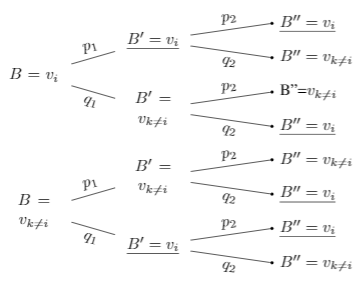

## Calculus of $\epsilon_1$

In [71]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')
q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')

#Pr[B'' = vi | B = vi]
ps = p1 * p2 + q1 * q2

#Pr[B'' = vi | B != vi]
qs = p1 * q2 + q1 * p2

e1 = sym.log(ps/qs)
e1

log((p1*p2 + q1*q2)/(p1*q2 + p2*q1))

## Analytical study of $\epsilon_1$ for L-GRR

In [72]:
# privacy guarantees
eps_perm = sym.Symbol('\epsilon_{\infty}')
eps_1 = sym.Symbol('\epsilon_{1}')

# domain size of attribute
k = sym.Symbol('k')

# GRR parameters
p1 = sym.exp(eps_perm) / (sym.exp(eps_perm) + k - 1)
q1 = (1 - p1) / (k - 1)

# 1-order equation to find p2
num = q1 - sym.exp(eps_1) * p1
den = (-p1 * sym.exp(eps_1)) + k*q1*sym.exp(eps_1) - q1*sym.exp(eps_1) - p1*(k-1)+q1

p2 = num/den
q2 = (1 - p2) / (k-1)
sym.simplify(p2)

(exp(\epsilon_{1} + \epsilon_{\infty}) - 1)/(-k*exp(\epsilon_{1}) + (k - 1)*exp(\epsilon_{\infty}) + exp(\epsilon_{1}) + exp(\epsilon_{1} + \epsilon_{\infty}) - 1)

### Validation: $e^{\epsilon_1}$ == $e^{\epsilon_1}$ ?

In [73]:
ps = p1 * p2 + q1 * q2
qs = p1 * q2 + q1 * p2

sym.simplify(ps/qs)

exp(\epsilon_{1})

### Numerical evaluation of e1

In [74]:
# domain size
k = 100

# select upper and lower privacy parameters
e_inf = 1
e_1 = 0.3421

# GRR parameters
p1 = np.exp(e_inf) / (np.exp(e_inf) + k - 1)
q1 = (1-p1)/(k-1)

# GRR parameters
p2 = (np.exp(e_inf + e_1) - 1) / (-k * np.exp(e_1) + (k-1)*np.exp(e_inf) + np.exp(e_1) + np.exp(e_inf + e_1) - 1)
q2 = (1-p2)/(k-1)

#Pr[B'' = vi | B = vi]
ps = p1 * p2 + q1 * q2

#Pr[B'' = vi | B != vi]
qs = p1 * q2 + q1 * p2

np.log(ps/qs), e_1

(0.3420999999999999, 0.3421)

### General Function for L_GRR

In [75]:
def param_L_GRR(eps_perm, eps_1, k):
    
    """Provides the flipping probabilities p1, q1, p2, q2 of using the L-GRR protocol.
    input: upper (eps_perm) and lower (eps_1) bound of the privacy parameter epsilon.
    output: p1, q1, p2, q2"""
    
    # GRR parameters
    p1 = np.exp(eps_perm) / (np.exp(eps_perm) + k - 1)
    q1 = (1 - p1) / (k - 1)

    # GRR parameters
    num = q1 - np.exp(eps_1) * p1
    den = (-p1 * np.exp(eps_1)) + k*q1*np.exp(eps_1) - q1*np.exp(eps_1) - p1*(k-1)+q1

    p2 = num/den
    q2 = (1 - p2) / (k-1)

    num = p1 * p2 + q1 * q2
    den = p1 * q2 + q1 * p2

    if round(np.log(num/den), 4) == eps_1:
        if (np.array([p1, q1, p2, q2]) >= 0).all():
            return p1, q1, p2, q2
        else: 
            raise ValueError('Probabilities are negative.')

# Analysis of unbiased frequency estimation and variances

## Estimator - Eq (9) in the paper

In [76]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')
q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')
n = sym.Symbol('n')
Ni = sym.Symbol('Ni')

print('estimator:')
f_L = sym.simplify((Ni-n*q2)/(p2-q2) - n*q1)/(n*(p1-q1))
f_L

estimator:


(Ni - n*q1*(p2 - q2) - n*q2)/(n*(p1 - q1)*(p2 - q2))

## Expectation of the estimator in Eq (9)

In [77]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')

q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')
n = sym.Symbol('n')
f = sym.Symbol('f')

E_n = n*f*(p1*p2 + (1-p1)*q2) + (n - n*f) * (q1*p2 + (1-q1)*q2)
E_fl = (E_n - n*q1*(p2 - q2) - n*q2) / (n*(p1 - q1) * (p2 - q2))
sym.simplify(E_fl)

f

The expected value converges to f(vi), i.e., unbiased estimation

# Variance of the estimator in Eq (9)

In [78]:
p1 = sym.Symbol('p1')
p2 = sym.Symbol('p2')

q1 = sym.Symbol('q1')
q2 = sym.Symbol('q2')
n = sym.Symbol('n')
# f = sym.Symbol('f')

# approximate variance with f = 0
f = 0

sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
    
sym.simplify((sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2))

(p2*q1 - q2*(q1 - 1))*(-p2*q1 + q2*(q1 - 1) + 1)/(n*(p1 - q1)**2*(p2 - q2)**2)

In [79]:
def Var_f_L(p1, q1, p2, q2, n = 10000):       
    
    f = 0 # approximate variance
    
    sig = q1*p2 + (1 - q1) * q2 + f*(((p1*p2) - p1*(1-p2)) + (q2*(1-p1) - (1-q2)*(1-p1)))
    
    return (sig * (1 - sig)) / (n * (p1 - q1)**2 * (p2 - q2)**2)

## Numerical evaluation (Section IV.D of the paper)

In [80]:
# upper bound, i.e., eps_inf
lst_eps = [0.5, 1, 2, 4]

# percentage for selecting lower bound, i.e., e1 = perc * eps_inf
lst_perc = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

# domain size for L-GRR
lst_k = [2, 32, 2**10]

dic_var = {perc:[] for perc in lst_perc}

# Round variance values with 6 digits
round_value = 6

for perc_inst in lst_perc:                    
    
    for eps_perm in lst_eps:
        
        # list of variance values
        lst_var_eps = []
        
        eps_1 = round(perc_inst * eps_perm, 4)
        
        # Appending L-GRR variances
        for k in lst_k: 
            p1,q1,p2,q2 = param_L_GRR(eps_perm, eps_1, k)
            lst_var_eps.append(float(round(Var_f_L(p1,q1,p2,q2), round_value)))
        
        # Appending L-OSUE variances
        try: 
            p1,q1,p2,q2 = param_L_OSUE(eps_perm, eps_1)
            lst_var_eps.append(round(Var_f_L(p1,q1,p2,q2), round_value))
        except:
            lst_var_eps.append('NC')
        
        # Appending L-SUE variances
        try: 
            p1,q1,p2,q2 = param_L_SUE(eps_perm, eps_1)
            lst_var_eps.append(round(Var_f_L(p1,q1,p2,q2), round_value))
        except:
            lst_var_eps.append('NC')        
        
        # Appending L-SOUE variances
        try: 
            p1,q1,p2,q2 = param_L_SOUE(eps_perm, eps_1)
            lst_var_eps.append(round(Var_f_L(p1,q1,p2,q2), round_value))
        except:
            lst_var_eps.append('NC')          
        
        # Appending L-OUE variances
        try: 
            p1,q1,p2,q2 = param_L_OUE(eps_perm, eps_1)  
            lst_var_eps.append(round(Var_f_L(p1,q1,p2,q2), round_value))
        except:
            lst_var_eps.append('NC')

        dic_var[perc_inst].append(lst_var_eps)

## Check variance values

In [81]:
df_var = pd.concat([pd.DataFrame(dic_var[perc]) for perc in lst_perc])
df_var.columns = ['L-GRR(k=2)', 'L-GRR(k=32)', 'L-GRR(k=$2^{10}$)', 'L-OSUE', 'L-SUE', 'L-SOUE', 'L-OUE']
df_var['L-GRR(k=$2^{10}$)'] = df_var['L-GRR(k=$2^{10}$)'].apply(lambda x: '%.5f' % x)
df_var['perc'] = [cons for cons in lst_perc for _ in range(4)]
df_var['eps_1'] = np.array([list(val * np.array(lst_eps)) for val in lst_perc]).reshape(-1)
df_var.set_index(['perc','eps_1'], inplace=True)
df_var

L-GRR(k=2)  L-GRR(k=32) L-GRR(k=$2^{10}$)    L-OSUE     L-SUE  \
perc eps_1                                                                  
0.6  0.30     0.001103     0.980969       26706.64042  0.004411  0.004436   
     0.60     0.000270     0.125036        3153.91118  0.001078  0.001103   
     1.20     0.000062     0.006327         117.36989  0.000247  0.000270   
     2.40     0.000011     0.000078           0.25903  0.000044  0.000062   
0.5  0.25     0.001592     2.088372       60218.72092  0.006367  0.006392   
     0.50     0.000392     0.268074        7198.83434  0.001567  0.001592   
     1.00     0.000092     0.013926         281.04330  0.000368  0.000392   
     2.00     0.000018     0.000188           0.74088  0.000072  0.000092   
0.4  0.20     0.002492     4.530779      135874.24278  0.009967  0.009992   
     0.40     0.000617     0.586823       16443.91803  0.002467  0.002492   
     0.80     0.000148     0.031552         673.74545  0.000593  0.000617   
     1.60     0.000032     0.000484           2.12772  0.000127  0.000148   
0.3  0.15     0.004436    10.689842      329836.44067  0.017744  0.017769   
     0.30     0.001103     1.398568       40412.79198  0.004411  0.004436   
     0.60     0.000270     0.078202        1737.75675  0.001078  0.001103   
     1.20     0.000062     0.001389           6.56584  0.000247  0.000270   
0.2  0.10     0.009992    30.850524      972656.62277  0.039967  0.039992   
     0.20     0.002492     4.080052      120651.23939  0.009967  0.009992   
     0.40     0.000617     0.237925        5443.09103  0.002467  0.002492   
     0.80     0.000148     0.004939          24.49048  0.000593  0.000617   
0.1  0.05     0.039992   154.117700     4941829.34018  0.159967  0.159992   
     0.10     0.009992    20.613446      620584.58635  0.039967  0.039992   
     0.20     0.002492     1.255550       29356.68268  0.009967  0.009992   
     0.40     0.000617     0.030494         156.12292  0.002467  0.002492   

              L-SOUE     L-OUE  
perc eps_1                      
0.6  0.30   0.005306  0.005549  
     0.60   0.001234  0.001347  
     1.20   0.000264  0.000310  
     2.40   0.000045  0.000057  
0.5  0.25   0.007336  0.007611  
     0.50   0.001740  0.001872  
     1.00   0.000389  0.000447  
     2.00   0.000073  0.000092  
0.4  0.20   0.011012  0.011324  
     0.40   0.002658  0.002812  
     0.80   0.000617  0.000690  
     1.60   0.000128  0.000156  
0.3  0.15   0.018863  0.019214  
     0.30   0.004620  0.004799  
     0.60   0.001106  0.001198  
     1.20   0.000248  0.000291  
0.2  0.10   0.041148  0.041536  
     0.20   0.010190  0.010394  
     0.40   0.002498  0.002610  
     0.80   0.000595  0.000659  
0.1  0.05   0.161191  0.161608  
     0.10   0.040201  0.040424  
     0.20   0.010000  0.010130  
     0.40   0.002469  0.002560

## Figure paper

In [82]:
# upper bound, i.e., eps_inf
lst_eps = np.arange(0.5, 4.1, 0.5)

#percentage for selecting lower bound, i.e., e1 = perc * eps_inf
lst_perc = [0.3, 0.6]

var_l_oue = {perc:[] for perc in lst_perc}
var_l_sue = {perc:[] for perc in lst_perc}
var_l_osue = {perc:[] for perc in lst_perc}
var_l_soue = {perc:[] for perc in lst_perc}

for perc_inst in lst_perc:                    
    
    for eps_perm in lst_eps:    
        eps_1 = round(perc_inst * eps_perm, 4)
        
        # L-OUE
        p1,q1,p2,q2 = param_L_OUE(eps_perm,eps_1)  
        var_l_oue[perc_inst].append(Var_f_L(p1,q1,p2,q2))

        # L-SUE
        p1,q1,p2,q2 = param_L_SUE(eps_perm,eps_1)
        var_l_sue[perc_inst].append(Var_f_L(p1,q1,p2,q2))
        
        # L-OSUE
        p1,q1,p2,q2 = param_L_OSUE(eps_perm,eps_1)
        var_l_osue[perc_inst].append(Var_f_L(p1,q1,p2,q2))
        
        # L-SOUE
        p1,q1,p2,q2 = param_L_SOUE(eps_perm,eps_1)
        var_l_soue[perc_inst].append(Var_f_L(p1,q1,p2,q2))

## Visualization

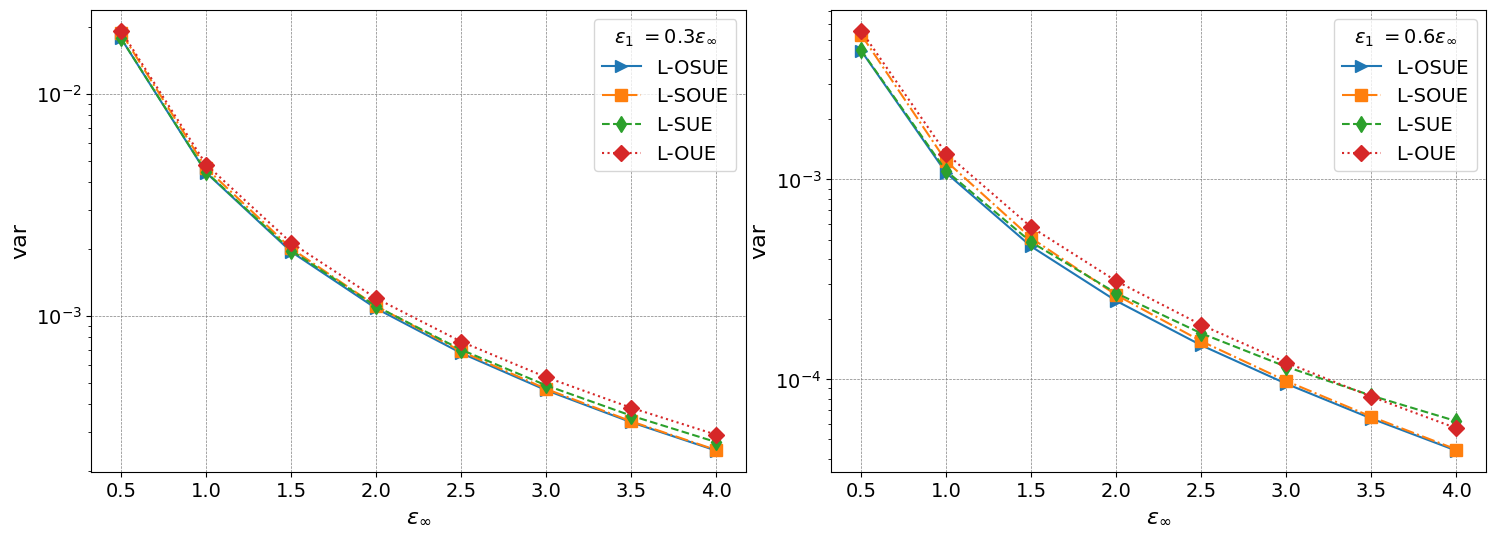

In [83]:
fig = plt.figure(figsize=(18, 6))
grid = plt.GridSpec(1, 2, wspace=0.13, hspace=0.2)

f1 = fig.add_subplot(grid[0])
f2 = fig.add_subplot(grid[1])

plots = [f1, f2]

markers = ['D', 'd', '>', 's', 'o', '*', 'x', 'X', '.']
linestyles = ['solid', 'dashed', 'dotted', 'dashdot', (0, (5, 10)), (0, (3, 10, 1, 10))]

fig_idx = 0

for perc_inst in lst_perc:

    plots[fig_idx].plot(var_l_osue[perc_inst],label='L-OSUE', marker='>', linestyle='solid')
    plots[fig_idx].plot(var_l_soue[perc_inst],label='L-SOUE', marker='s', linestyle='dashdot')
    plots[fig_idx].plot(var_l_sue[perc_inst],label='L-SUE', marker='d', linestyle='dashed')
    plots[fig_idx].plot(var_l_oue[perc_inst],label='L-OUE', marker='D', linestyle='dotted')
    
    
    plots[fig_idx].set_yscale('log')
    plots[fig_idx].set_xticks(range(len(lst_eps)))
    plots[fig_idx].set_xticklabels([round(val,4) for val in lst_eps])
    plots[fig_idx].set_ylabel('var', fontsize=16)
    plots[fig_idx].set_xlabel("$\epsilon_{\infty}$", fontsize=16)
    plots[fig_idx].legend(title='$\epsilon_1$ $=$' +f'${perc_inst}$'+ '$\epsilon_{\infty}$',\
                            prop=dict(weight='normal'),fontsize=14,loc='upper right')
    
    
    plots[fig_idx].grid(color='grey', linestyle='--', linewidth=0.5)
    fig_idx+=1

plt.show();

#### Conclusion

L-OSUE provides smaller variance values than the state of the art L-SUE (i.e., basic-rappor) and L-OUE (i.e., OUE with memoization)

In [84]:
var_l_osue[0.3] < var_l_sue[0.3], var_l_osue[0.3] < var_l_oue[0.3]

(True, True)

In [85]:
var_l_osue[0.6] < var_l_sue[0.6], var_l_osue[0.6] < var_l_oue[0.6]

(True, True)